In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance, ks_2samp

import matplotlib.pyplot as plt

def view_single_distribution(
    df,
    metric="area",
    bins=50,
    density=True,
    ax=None,
    title_prefix=""
):
    """
    View a histogram of a single metric from a DataFrame containing
    columns like: ['video', 'frame', 'area', 'eccentricity', 'solidity', 'perimeter'].

    Args:
        df (pd.DataFrame): The input DataFrame.
        metric (str): Which column to visualize, e.g. 'area', 'eccentricity', 'solidity', 'perimeter'.
        bins (int): Number of histogram bins.
        density (bool): Whether to normalize the histogram (density=True) or show counts (density=False).
        ax (matplotlib.axes.Axes, optional): Matplotlib Axes to plot on. 
            If None, a new figure/axes is created.
        title_prefix (str, optional): An optional prefix added to the plot title (e.g. "Real" or "Generated").

    Returns:
        matplotlib.axes.Axes: The axes on which the histogram was plotted.
    """
    if metric not in df.columns:
        raise ValueError(
            f"Metric '{metric}' not found in DataFrame columns. "
            f"Available columns: {df.columns.tolist()}"
        )

    # Drop any NaN or invalid values
    values = df[metric].dropna()

    # Create new figure/axes if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot histogram
    ax.hist(values, bins=bins, alpha=0.7, edgecolor="black", density=density)
    ax.set_title(f"{title_prefix} {metric.capitalize()} Distribution")
    ax.set_xlabel(metric)
    ax.set_ylabel("Density" if density else "Count")

    return ax

def compare_distributions_wasserstein(df_real, df_gen, metric):
    """Compute Wasserstein distance for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    return wasserstein_distance(real_values, gen_values)

def compare_distributions_ks(df_real, df_gen, metric):
    """Compute KS statistic for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ks_stat, ks_pval = ks_2samp(real_values, gen_values)
    return ks_stat, ks_pval

def plot_overlaid_histograms(df_real, df_gen, metric, ax, bins=50):
    """Plot two overlaid histograms for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ax.hist(real_values, bins=bins, alpha=0.5, label="Real", density=True)
    ax.hist(gen_values,  bins=bins, alpha=0.5, label="Generated", density=True)
    ax.set_xlabel(metric)
    ax.set_ylabel("Density")
    ax.legend()

In [6]:
dfs = {
    "real": pd.read_csv("../results/real_videos_10/all_morphology.csv"),
    "r64_150": pd.read_csv("../results/i2v_r64_150/all_morphology.csv"),
    "r64_250": pd.read_csv("../results/i2v_r64_250/all_morphology.csv"),
    "r64_500": pd.read_csv("../results/i2v_r64_500/all_morphology.csv"),
    "r64_750": pd.read_csv("../results/i2v_r64_750/all_morphology.csv"),
    "r64_900": pd.read_csv("../results/i2v_r64_900/all_morphology.csv"),
    "r128_250": pd.read_csv("../results/i2v_r128_250/all_morphology.csv"),
    "r128_500": pd.read_csv("../results/i2v_r128_500/all_morphology.csv"),
    "r128_750": pd.read_csv("../results/i2v_r128_750/all_morphology.csv"),
    "r128_900": pd.read_csv("../results/i2v_r128_900/all_morphology.csv"),
    "r256_150": pd.read_csv("../results/i2v_r256_150/all_morphology.csv"),
    "r256_250": pd.read_csv("../results/i2v_r256_250/all_morphology.csv"),
    "r256_375": pd.read_csv("../results/i2v_r256_375/all_morphology.csv"),
    "r256_750": pd.read_csv("../results/i2v_r256_750/all_morphology.csv"),
    "r256_900": pd.read_csv("../results/i2v_r256_900/all_morphology.csv"),
}

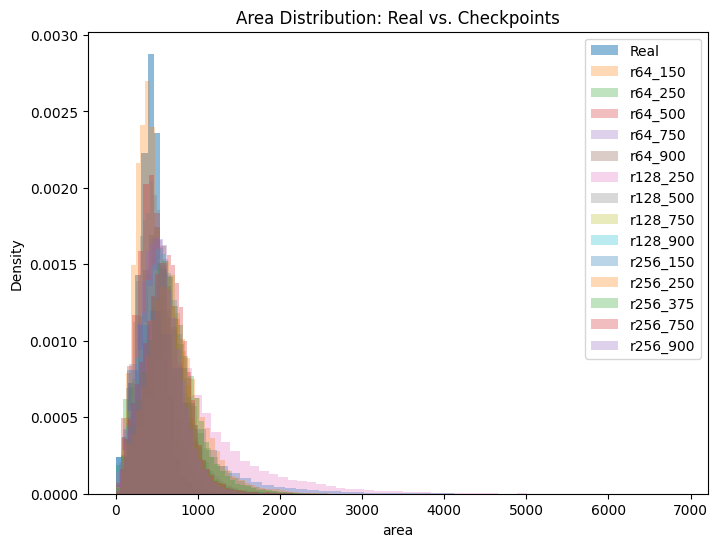

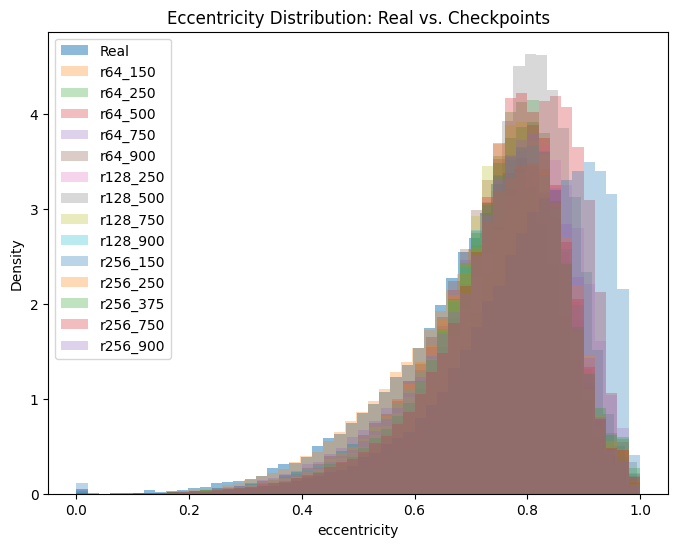

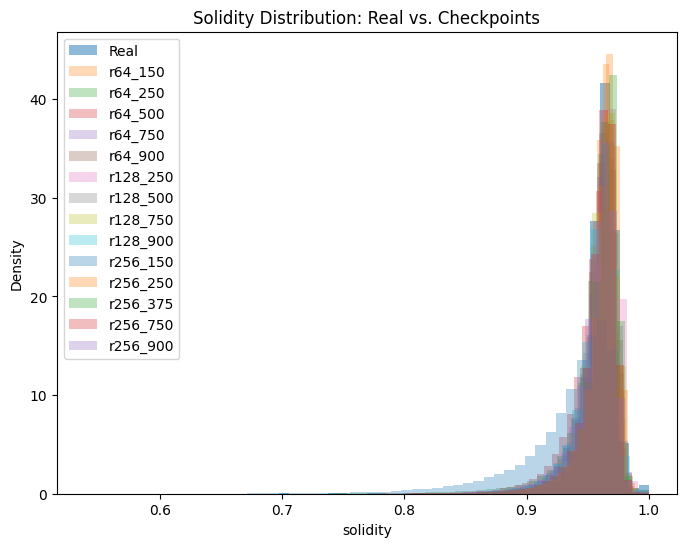

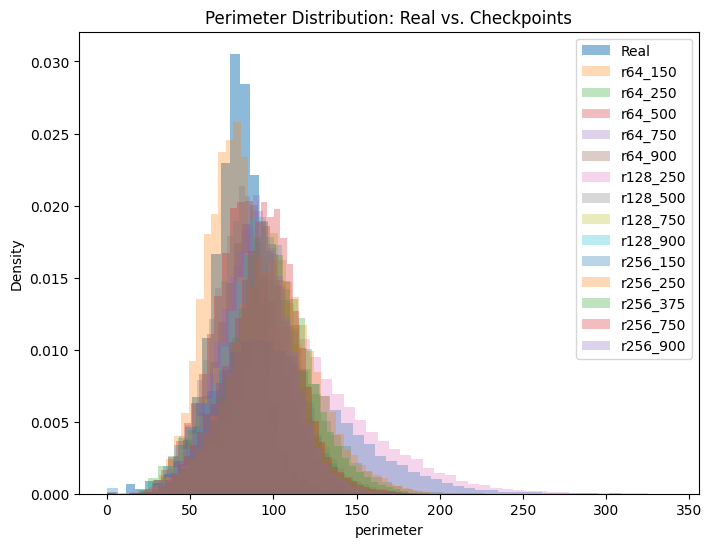

In [7]:
import matplotlib.pyplot as plt

metrics = ["area", "eccentricity", "solidity", "perimeter"]

for metric in metrics:
    plt.figure(figsize=(8,6))
    # Plot real distribution
    plt.hist(dfs["real"][metric].dropna(), bins=50, alpha=0.5, density=True, label="Real")
    
    # Plot each checkpoint overlayed
    for name, df in dfs.items():
        if name == "real":
            continue
        plt.hist(df[metric].dropna(), bins=50, alpha=0.3, density=True, label=name)
    
    plt.title(f"{metric.capitalize()} Distribution: Real vs. Checkpoints")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [8]:
import pandas as pd
from scipy.stats import wasserstein_distance, ks_2samp

metrics = ["area", "eccentricity", "solidity", "perimeter"]
results = []

for checkpoint_name, df_gen in dfs.items():
    if checkpoint_name == "real":
        continue
    for metric in metrics:
        real_vals = dfs["real"][metric].dropna()
        gen_vals  = df_gen[metric].dropna()
        
        wdist  = wasserstein_distance(real_vals, gen_vals)
        ks_stat, ks_pval = ks_2samp(real_vals, gen_vals)
        
        results.append({
            "checkpoint": checkpoint_name,
            "metric": metric,
            "wasserstein_distance": wdist,
            "ks_stat": ks_stat,
            "ks_pval": ks_pval
        })

df_results = pd.DataFrame(results)
df_results

,checkpoint,metric,wasserstein_distance,ks_stat,ks_pval
0,r64_150,area,39.279306,0.127519,0.000000e+00
1,r64_150,eccentricity,0.009291,0.046399,2.119190e-117
2,r64_150,solidity,0.002063,0.030434,9.659768e-51
3,r64_150,perimeter,3.914429,0.126010,0.000000e+00
4,r64_250,area,212.718794,0.380329,0.000000e+00
5,r64_250,eccentricity,0.042971,0.139670,0.000000e+00
6,r64_250,solidity,0.005961,0.115451,0.000000e+00
7,r64_250,perimeter,18.757834,0.411511,0.000000e+00
8,r64_500,area,43.329530,0.115138,0.000000e+00
9,r64_500,eccentricity,0.084379,0.275713,0.000000e+00


In [9]:
mean_dists = (
    df_results
    .groupby("checkpoint")["wasserstein_distance"]
    .mean()
    .sort_values()
)
print(mean_dists)

# The top row(s) in this sorted output have the smallest distance on average,
# indicating the best morphological match to real data.

checkpoint
r64_150      10.801272
r64_500      12.442073
r128_500     15.349766
r256_900     33.132765
r64_900      38.221012
r64_750      41.243875
r128_900     42.919456
r128_750     43.018752
r256_750     49.762714
r64_250      57.881390
r256_375     66.022002
r256_150     74.622473
r256_250     76.950017
r128_250    148.422765
Name: wasserstein_distance, dtype: float64


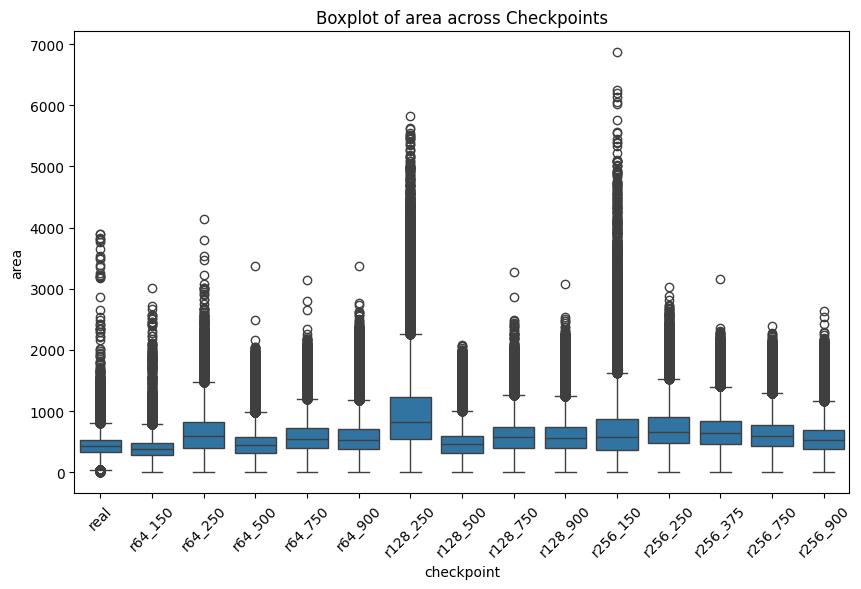

In [10]:
import seaborn as sns

def compare_boxplot(dfs, metric="area"):
    # Flatten out: create a single combined DataFrame for plotting
    combined = []
    for name, df in dfs.items():
        if metric in df.columns:
            for val in df[metric].dropna():
                combined.append({"checkpoint": name, metric: val})
    
    df_combined = pd.DataFrame(combined)
    
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_combined, x="checkpoint", y=metric)
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {metric} across Checkpoints")
    plt.show()

compare_boxplot(dfs, "area")